In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis.rms import RMSD
from MDAnalysis.analysis import align

import molecularnodes as mn
import numpy as np
import bpy
from ggmolvis.ggmolvis import GGMolVis

No MNSession found to load for this .blend file.
Creating new GGMolVis


In [2]:
#bpy.app.binary_path = '/Applications/Blender.app/Contents/MacOS/Blender'

# Trajectory Visualization

In [3]:
u_sys = mda.Universe('/Users/scottzhuang/jupyter_ground/b2ar_lm_gi_v4_rep6/system.pdb')

u = mda.Universe('/Users/scottzhuang/jupyter_ground/b2ar_lm_gi_v4_rep6/protein_aligned.pdb',
                 '/Users/scottzhuang/jupyter_ground/b2ar_lm_gi_v4_rep6/protein_aligned.xtc')

align.alignto(u_sys, u, select="protein and name CA", weights="mass")

/Applications/Blender.app/Contents/Resources/4.2/python/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


(43.5098527240464, 0.007200433673581199)

In [4]:
from MDAnalysis.transformations import PositionAverager
N=5
transformation = PositionAverager(N, check_reset=True)
u.trajectory.add_transformations(transformation)

In [5]:
n_frames = u.trajectory.n_frames

In [6]:
ggmv = GGMolVis()

In [7]:
# First showing the protein of GPCR 

In [8]:
gpcr_ag = u.select_atoms("segid P5 P6")
gpcr_ag_mol = ggmv.molecule(gpcr_ag, name="GPCR", style='cartoon', material='ambient')

In [9]:
gprot_ag = u.select_atoms("protein and not segid P5 P6")
gprot_ag_mol = ggmv.molecule(gprot_ag, name="Gprotein", style='surface', material='ambient')

In [10]:
ligand_ag = u.select_atoms("resname LM and not name H*")
ligand_ag_mol = ggmv.molecule(ligand_ag, name="ligand", style='vdw')

In [13]:
# set the ligand emission strength to 1 and color to orange
ligand_ag_mol.material.material.node_tree.nodes.get('Principled BSDF').inputs['Emission Strength'].default_value = 2
ligand_ag_mol.material.material.node_tree.nodes.get('Principled BSDF').inputs['Emission Color'].default_value = (1, 0.5, 0.31, 1)

In [14]:
frame_mapping = np.zeros(3000)
frame_mapping[100:100+n_frames] = np.arange(n_frames)
frame_mapping[100+n_frames:] = n_frames-1
frame_mapping = frame_mapping.astype(int)

In [15]:
gpcr_ag_mol.trajectory.frame_mapping = list(frame_mapping)
gprot_ag_mol.trajectory.frame_mapping =  list(frame_mapping)
ligand_ag_mol.trajectory.frame_mapping =  list(frame_mapping)

In [16]:
# set gprot_ag_mol.object invisible until frame 50
# Set the object to be invisible in the viewport and render at frame 1
obj = gprot_ag_mol.object
bpy.context.scene.frame_set(0)
obj.hide_viewport = True
obj.keyframe_insert(data_path="hide_viewport")
obj.hide_render = True
obj.keyframe_insert(data_path="hide_render")

# Set the object to be visible in the viewport and render at frame 50
bpy.context.scene.frame_set(50)
obj.hide_viewport = False
obj.keyframe_insert(data_path="hide_viewport")
obj.hide_render = False
obj.keyframe_insert(data_path="hide_render")

bpy.context.scene.frame_set(400)
obj.hide_viewport = True
obj.keyframe_insert(data_path="hide_viewport")
obj.hide_render = True
obj.keyframe_insert(data_path="hide_render")

obj = ligand_ag_mol.object
bpy.context.scene.frame_set(0)
obj.hide_viewport = True
obj.keyframe_insert(data_path="hide_viewport")
obj.hide_render = True
obj.keyframe_insert(data_path="hide_render")

# Set the object to be visible in the viewport and render at frame 50
bpy.context.scene.frame_set(100)
obj.hide_viewport = False
obj.keyframe_insert(data_path="hide_viewport")
obj.hide_render = False
obj.keyframe_insert(data_path="hide_render")

bpy.context.scene.frame_set(400)
obj.hide_viewport = True
obj.keyframe_insert(data_path="hide_viewport")
obj.hide_render = True
obj.keyframe_insert(data_path="hide_render")

/Applications/Blender.app/Contents/Resources/4.2/python/lib/python3.11/site-packages/MDAnalysis/transformations/positionaveraging.py:193: Warning: Cannot average position for non sequentialiterations. Averager will be reset.
  warnings.warn('Cannot average position for non sequential'


True

In [17]:
if False:
    membrane = u_sys.select_atoms("segid L")
    membrane_mol = ggmv.molecule(membrane, name="membrane", style='vdw')
    water = u_sys.select_atoms("segid W*")
    water_mol = ggmv.molecule(water, name="water", style='surface', material='transparent')
    ion = u_sys.select_atoms("segid I")
    ion_mol = ggmv.molecule(ion, name="ion", style='vdw')
    res_alpha = np.zeros(5000)
    res_alpha[200:500] = np.linspace(0, 1, 300)
    res_alpha[500:1000] = np.linspace(1, 0, 500)
    membrane_mol.material.material_modifier = {'Alpha': res_alpha}
    #water_mol.material.material_modifier = {'Alpha': res_alpha}
    ion_mol.material.material_modifier = {'Alpha': res_alpha}

In [18]:
ggmv.global_camera.world.location = [-2.046326160430908, -0.0737379640340805, -0.16240833699703217]

ggmv.global_camera.world.rotation = [84.66449095129599, 1.0495347652703872, -87.60220995483184]

In [19]:
light = bpy.data.objects["Key Light.001"]
target = gpcr_ag_mol.object
direction = light.location - target.location

# Create a rotation that makes the light point towards the target
rot_quat = direction.to_track_quat('Z', 'Y')  # Align the Z axis of the light with the target

# Apply the rotation to the light
light.rotation_euler = rot_quat.to_euler()

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp08fhg_gm.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp08fhg_gm.PNG'
Time: 00:01.75 (Saving: 00:00.01)



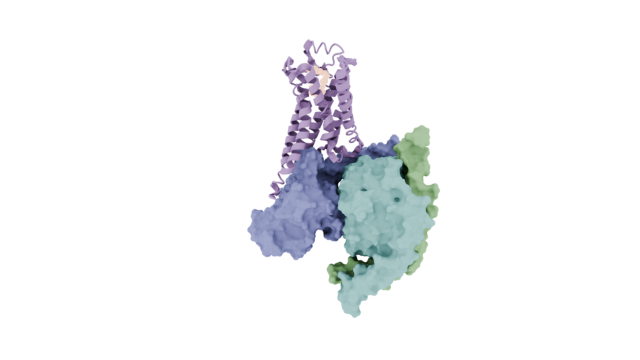

In [21]:
ggmv.global_camera.render()

In [21]:
ggmv.global_camera.render(mode='movie', resolution=(1920, 1080),
                          filepath='./gpcr_showcase.mp4')

Rendering to: ./gpcr_showcase.mp4
Append frame 1
Time: 00:59.18 (Saving: 00:00.54)

Append frame 2
Time: 00:56.40 (Saving: 00:00.53)



: 